# Import Library

In [1]:
#Import required libraries
import csv
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, ArrayDictionary
import string
import langid

# Dataset

In [2]:
#Membuka file data tweets
df = pd.read_csv("data-youtube-comments.csv")

# Data Pre-Processing

In [3]:
#menampilkan dataset
df

,datetime,username,comments
0,2024-01-11T13:14:25Z,@herisaputra8950,Pesan Gusdur : pejabat yang ikhlas itu prabowo😢
1,2024-01-12T16:52:17Z,@weed2898,Jawaban ga ada yg nyambung di sesi tanya jawab...
2,2024-01-11T07:44:40Z,@gunturSalwa-cr9jz,Senua bisa berteori tapi yang terpnting siapa ...
3,2024-01-11T01:13:18Z,@bangkong_official,anak muda indonesia ga butuh pemimpin yang pan...
4,2024-01-10T07:26:27Z,@diamond_mitha,Refleksi pakdeee... For reall.. bismillah pak....
...,...,...,...
44986,2023-09-19T15:31:42Z,@DwiAndikaYT18,"SIAPA DISINI YANG CAPRESNYA EMOSIAN, PENCULIK ..."
44987,2023-09-19T15:31:46Z,@tabyathherms5946,Banteng still the winner..FACT!!!
44988,2023-09-19T15:37:26Z,@hekalx-iq1fz,​@@tabyathherms5946berak
44989,2023-09-19T15:24:04Z,@animestel,Aldi Taher for The prosperity of Indonesia <a ...


In [4]:
#menghapus dataframe publishedAt authorDisplayName likeCount
df.drop(df.columns[[0,1]], axis=1, inplace=True)

display(df)

,comments
0,Pesan Gusdur : pejabat yang ikhlas itu prabowo😢
1,Jawaban ga ada yg nyambung di sesi tanya jawab...
2,Senua bisa berteori tapi yang terpnting siapa ...
3,anak muda indonesia ga butuh pemimpin yang pan...
4,Refleksi pakdeee... For reall.. bismillah pak....
...,...
44986,"SIAPA DISINI YANG CAPRESNYA EMOSIAN, PENCULIK ..."
44987,Banteng still the winner..FACT!!!
44988,​@@tabyathherms5946berak
44989,Aldi Taher for The prosperity of Indonesia <a ...


In [6]:
df.drop_duplicates(subset ="comments", keep = 'first', inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, 0 to 44990
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  38915 non-null  object
dtypes: object(1)
memory usage: 608.1+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df

,comments
0,Pesan Gusdur : pejabat yang ikhlas itu prabowo😢
1,Jawaban ga ada yg nyambung di sesi tanya jawab...
2,Senua bisa berteori tapi yang terpnting siapa ...
3,anak muda indonesia ga butuh pemimpin yang pan...
4,Refleksi pakdeee... For reall.. bismillah pak....
...,...
44985,"Pilih dubur apa pilih extremist,,"
44987,Banteng still the winner..FACT!!!
44988,​@@tabyathherms5946berak
44989,Aldi Taher for The prosperity of Indonesia <a ...


# Case Folding

In [10]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['comments'].apply(case_folding)
df.head(50)

,comments,case_folding
0,Pesan Gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur : pejabat yang ikhlas itu prabowo😢
1,Jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...
2,Senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...
3,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...
4,Refleksi pakdeee... For reall.. bismillah pak....,refleksi pakdeee... for reall.. bismillah pak....
5,mba nana keurenn,mba nana keurenn
6,Kapan yaaa bangsa ini PINTER?<br><br>Ngakunya ...,kapan yaaa bangsa ini pinter?<br><br>ngakunya ...
7,Lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...
8,Welcome bapak Prabowo to presiden RI,welcome bapak prabowo to presiden ri
9,Ganjar...🤟,ganjar...🤟


# Cleaning

In [12]:
import pandas as pd
import re
import string

def cleaningText(text):
    if isinstance(text, str):  # Ensure input is a string
        text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
        text = re.sub(r'#[A-Za-z0-9]+', '', text)  # Remove hashtags
        text = re.sub(r'RT[\s]+', '', text)  # Remove RT
        text = re.sub(r"http\S+", '', text)  # Remove links
        text = re.sub(r'&[a-zA-Z]+;', '', text)  # Remove HTML entities like &quot; &amp;
        text = re.sub(r'\bhref\b', '', text)  # Remove specific keywords like 'href'
        text = re.sub(r'[^A-Za-z ]+', '', text)  # Remove all non-alphabet characters
        text = text.replace('\n', ' ')  # Replace newlines with space
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove all punctuations
        text = text.strip()  # Remove spaces from both sides
        text = re.sub(r'(?<=[.!?])\s*', ' ', text)  # Handle spacing after punctuation
        text = re.sub(r'\b[A-Za-z]\b', '', text)  # Remove single characters
        return text
    else:
        return ''  # Return an empty string if not a string


# Terapkan fungsi cleaningText pada kolom 'case_folding'
df['cleaning'] = df['case_folding'].apply(cleaningText)

# Lihat hasilnya
df.head(50)


,comments,case_folding,cleaning
0,Pesan Gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur pejabat yang ikhlas itu prabowo
1,Jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...
2,Senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...
3,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...
4,Refleksi pakdeee... For reall.. bismillah pak....,refleksi pakdeee... for reall.. bismillah pak....,refleksi pakdeee for reall bismillah pak indon...
5,mba nana keurenn,mba nana keurenn,mba nana keurenn
6,Kapan yaaa bangsa ini PINTER?<br><br>Ngakunya ...,kapan yaaa bangsa ini pinter?<br><br>ngakunya ...,kapan yaaa bangsa ini pinterbrbrngakunya org y...
7,Lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...
8,Welcome bapak Prabowo to presiden RI,welcome bapak prabowo to presiden ri,welcome bapak prabowo to presiden ri
9,Ganjar...🤟,ganjar...🤟,ganjar


# Tokenisasi

In [13]:
# Fungsi untuk tokenisasi
def tokenize(text):
    if isinstance(text, str):
        tokens = text.split()
        return tokens
    else:
        return []

df['tokenize'] = df['cleaning'].apply(tokenize)
df.head(50)

,comments,case_folding,cleaning,tokenize
0,Pesan Gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur pejabat yang ikhlas itu prabowo,"[pesan, gusdur, pejabat, yang, ikhlas, itu, pr..."
1,Jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,"[jawaban, ga, ada, yg, nyambung, di, sesi, tan..."
2,Senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,"[senua, bisa, berteori, tapi, yang, terpnting,..."
3,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,"[anak, muda, indonesia, ga, butuh, pemimpin, y..."
4,Refleksi pakdeee... For reall.. bismillah pak....,refleksi pakdeee... for reall.. bismillah pak....,refleksi pakdeee for reall bismillah pak indon...,"[refleksi, pakdeee, for, reall, bismillah, pak..."
5,mba nana keurenn,mba nana keurenn,mba nana keurenn,"[mba, nana, keurenn]"
6,Kapan yaaa bangsa ini PINTER?<br><br>Ngakunya ...,kapan yaaa bangsa ini pinter?<br><br>ngakunya ...,kapan yaaa bangsa ini pinterbrbrngakunya org y...,"[kapan, yaaa, bangsa, ini, pinterbrbrngakunya,..."
7,Lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...,"[lha, trus, kenapa, koran, kompas, ngasi, beri..."
8,Welcome bapak Prabowo to presiden RI,welcome bapak prabowo to presiden ri,welcome bapak prabowo to presiden ri,"[welcome, bapak, prabowo, to, presiden, ri]"
9,Ganjar...🤟,ganjar...🤟,ganjar,[ganjar]


# Normalisasi

In [14]:
normalized_word = pd.read_csv("slang.csv",encoding='latin1')

normalized_word_dict = {}
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 
        
def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df['Normalisasi'] = df['tokenize'].apply(normalized_term)
df.head(50)

C:\Users\ekaad\AppData\Local\Temp\ipykernel_14856\3827775988.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
C:\Users\ekaad\AppData\Local\Temp\ipykernel_14856\3827775988.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


,comments,case_folding,cleaning,tokenize,Normalisasi
0,Pesan Gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur pejabat yang ikhlas itu prabowo,"[pesan, gusdur, pejabat, yang, ikhlas, itu, pr...","[pesan, gusdur, pejabat, yang, ikhlas, itu, pr..."
1,Jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,"[jawaban, ga, ada, yg, nyambung, di, sesi, tan...","[jawaban, tidak, ada, yang, menyambung, di, se..."
2,Senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,"[senua, bisa, berteori, tapi, yang, terpnting,...","[semua, bisa, berteori, tapi, yang, terpenting..."
3,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,"[anak, muda, indonesia, ga, butuh, pemimpin, y...","[anak, muda, indonesia, tidak, butuh, pemimpin..."
4,Refleksi pakdeee... For reall.. bismillah pak....,refleksi pakdeee... for reall.. bismillah pak....,refleksi pakdeee for reall bismillah pak indon...,"[refleksi, pakdeee, for, reall, bismillah, pak...","[refleksi, pakde, untuk, reall, bismillah, bap..."
5,mba nana keurenn,mba nana keurenn,mba nana keurenn,"[mba, nana, keurenn]","[kakak, nana, keren]"
6,Kapan yaaa bangsa ini PINTER?<br><br>Ngakunya ...,kapan yaaa bangsa ini pinter?<br><br>ngakunya ...,kapan yaaa bangsa ini pinterbrbrngakunya org y...,"[kapan, yaaa, bangsa, ini, pinterbrbrngakunya,...","[kapan, ya, bangsa, ini, pinterbrbrngakunya, o..."
7,Lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...,"[lha, trus, kenapa, koran, kompas, ngasi, beri...","[lah, terus, kenapa, koran, kompas, mengasih, ..."
8,Welcome bapak Prabowo to presiden RI,welcome bapak prabowo to presiden ri,welcome bapak prabowo to presiden ri,"[welcome, bapak, prabowo, to, presiden, ri]","[selamat datang, bapak, prabowo, ke, presiden,..."
9,Ganjar...🤟,ganjar...🤟,ganjar,[ganjar],[ganjar]


# Stopwords Removal

In [15]:
from nltk.corpus import stopwords
stopword = stopwords.words('indonesian')
txt_stopword = pd.read_csv("kamus.csv", names=["stopwords"], header=None, encoding='latin1')

stopword.extend(["yaha","wut","wal", "pov","aaaaaa", "nya", "pke", "dehh", "wkwk", "dpt", "jg", "yg", "kl", "wkwkwkwkwkw",
                 "ia", "msih", "hehe", "hahaha", "haha", "kok", "nih", "langsumg", "lha", "ya", "sik", "lah",
                 "gaes", "guys", "nih", "knphehehehe", "gas", "amp", "ct", "sih", "aj","P","p","wkwkwk","quot","wk","hah","is",
                 "si","sih","loh","lho","akwkwk","ckckck","hahahaha","hihihihih","hih","Hih","ckckck","ckckc","kog","yth","nge",
                 "coy","i","rt", "utk","nan","&amp","hih", "deh", "nah","s","a","c","p","woy","bro","pret","gtgtgtgt" ])

stopword.extend(list(txt_stopword["stopwords"][0]))
stopword = set(stopword)

def stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

# Assuming you have a 'Normalisasi' column in your DataFrame
df['Stopwords'] = df['Normalisasi'].apply(stopwords)
df.head(50)

,comments,case_folding,cleaning,tokenize,Normalisasi,Stopwords
0,Pesan Gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur pejabat yang ikhlas itu prabowo,"[pesan, gusdur, pejabat, yang, ikhlas, itu, pr...","[pesan, gusdur, pejabat, yang, ikhlas, itu, pr...","[pesan, gusdur, pejabat, ikhlas, prabowo]"
1,Jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,"[jawaban, ga, ada, yg, nyambung, di, sesi, tan...","[jawaban, tidak, ada, yang, menyambung, di, se...","[menyambung, sesi, debat, panggung, ngawur]"
2,Senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,"[senua, bisa, berteori, tapi, yang, terpnting,...","[semua, bisa, berteori, tapi, yang, terpenting...","[berteori, terpenting, ikhlas, britulah, sosok..."
3,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,"[anak, muda, indonesia, ga, butuh, pemimpin, y...","[anak, muda, indonesia, tidak, butuh, pemimpin...","[anak, muda, indonesia, butuh, pemimpin, panda..."
4,Refleksi pakdeee... For reall.. bismillah pak....,refleksi pakdeee... for reall.. bismillah pak....,refleksi pakdeee for reall bismillah pak indon...,"[refleksi, pakdeee, for, reall, bismillah, pak...","[refleksi, pakde, untuk, reall, bismillah, bap...","[refleksi, pakde, reall, bismillah, indonesia,..."
5,mba nana keurenn,mba nana keurenn,mba nana keurenn,"[mba, nana, keurenn]","[kakak, nana, keren]","[kakak, nana, keren]"
6,Kapan yaaa bangsa ini PINTER?<br><br>Ngakunya ...,kapan yaaa bangsa ini pinter?<br><br>ngakunya ...,kapan yaaa bangsa ini pinterbrbrngakunya org y...,"[kapan, yaaa, bangsa, ini, pinterbrbrngakunya,...","[kapan, ya, bangsa, ini, pinterbrbrngakunya, o...","[bangsa, pinterbrbrngakunya, orang, berpendidi..."
7,Lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...,"[lha, trus, kenapa, koran, kompas, ngasi, beri...","[lah, terus, kenapa, koran, kompas, mengasih, ...","[koran, kompas, mengasih, berita, kebijakan, p..."
8,Welcome bapak Prabowo to presiden RI,welcome bapak prabowo to presiden ri,welcome bapak prabowo to presiden ri,"[welcome, bapak, prabowo, to, presiden, ri]","[selamat datang, bapak, prabowo, ke, presiden,...","[selamat datang, prabowo, presiden, indonesia]"
9,Ganjar...🤟,ganjar...🤟,ganjar,[ganjar],[ganjar],[ganjar]


# Stemming

In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [17]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['Stemming'] = df['Stopwords'].apply(lambda x: ' '.join(stem_text(x)))

df.head(5)

,comments,case_folding,cleaning,tokenize,Normalisasi,Stopwords,Stemming
0,Pesan Gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur pejabat yang ikhlas itu prabowo,"[pesan, gusdur, pejabat, yang, ikhlas, itu, pr...","[pesan, gusdur, pejabat, yang, ikhlas, itu, pr...","[pesan, gusdur, pejabat, ikhlas, prabowo]",pesan gusdur jabat ikhlas prabowo
1,Jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,"[jawaban, ga, ada, yg, nyambung, di, sesi, tan...","[jawaban, tidak, ada, yang, menyambung, di, se...","[menyambung, sesi, debat, panggung, ngawur]",sambung sesi debat panggung ngawur
2,Senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,"[senua, bisa, berteori, tapi, yang, terpnting,...","[semua, bisa, berteori, tapi, yang, terpenting...","[berteori, terpenting, ikhlas, britulah, sosok...",teori penting ikhlas britulah sosok pimpin ido...
3,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,"[anak, muda, indonesia, ga, butuh, pemimpin, y...","[anak, muda, indonesia, tidak, butuh, pemimpin...","[anak, muda, indonesia, butuh, pemimpin, panda...",anak muda indonesia butuh pimpin pandai rangka...
4,Refleksi pakdeee... For reall.. bismillah pak....,refleksi pakdeee... for reall.. bismillah pak....,refleksi pakdeee for reall bismillah pak indon...,"[refleksi, pakdeee, for, reall, bismillah, pak...","[refleksi, pakde, untuk, reall, bismillah, bap...","[refleksi, pakde, reall, bismillah, indonesia,...",refleksi pakde reall bismillah indonesia butuh


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, 0 to 44990
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comments      38915 non-null  object
 1   case_folding  38915 non-null  object
 2   cleaning      38916 non-null  object
 3   tokenize      38916 non-null  object
 4   Normalisasi   38916 non-null  object
 5   Stopwords     38916 non-null  object
 6   Stemming      38916 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


In [19]:
# Menghapus baris yang mengandung nilai kosong
df_cleaned = df.dropna()

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38915 entries, 0 to 44990
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comments      38915 non-null  object
 1   case_folding  38915 non-null  object
 2   cleaning      38915 non-null  object
 3   tokenize      38915 non-null  object
 4   Normalisasi   38915 non-null  object
 5   Stopwords     38915 non-null  object
 6   Stemming      38915 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


In [21]:
df.head(20)

,comments,case_folding,cleaning,tokenize,Normalisasi,Stopwords,Stemming
0,Pesan Gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur : pejabat yang ikhlas itu prabowo😢,pesan gusdur pejabat yang ikhlas itu prabowo,"[pesan, gusdur, pejabat, yang, ikhlas, itu, pr...","[pesan, gusdur, pejabat, yang, ikhlas, itu, pr...","[pesan, gusdur, pejabat, ikhlas, prabowo]",pesan gusdur jabat ikhlas prabowo
1,Jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,jawaban ga ada yg nyambung di sesi tanya jawab...,"[jawaban, ga, ada, yg, nyambung, di, sesi, tan...","[jawaban, tidak, ada, yang, menyambung, di, se...","[menyambung, sesi, debat, panggung, ngawur]",sambung sesi debat panggung ngawur
2,Senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,senua bisa berteori tapi yang terpnting siapa ...,"[senua, bisa, berteori, tapi, yang, terpnting,...","[semua, bisa, berteori, tapi, yang, terpenting...","[berteori, terpenting, ikhlas, britulah, sosok...",teori penting ikhlas britulah sosok pimpin ido...
3,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,anak muda indonesia ga butuh pemimpin yang pan...,"[anak, muda, indonesia, ga, butuh, pemimpin, y...","[anak, muda, indonesia, tidak, butuh, pemimpin...","[anak, muda, indonesia, butuh, pemimpin, panda...",anak muda indonesia butuh pimpin pandai rangka...
4,Refleksi pakdeee... For reall.. bismillah pak....,refleksi pakdeee... for reall.. bismillah pak....,refleksi pakdeee for reall bismillah pak indon...,"[refleksi, pakdeee, for, reall, bismillah, pak...","[refleksi, pakde, untuk, reall, bismillah, bap...","[refleksi, pakde, reall, bismillah, indonesia,...",refleksi pakde reall bismillah indonesia butuh
5,mba nana keurenn,mba nana keurenn,mba nana keurenn,"[mba, nana, keurenn]","[kakak, nana, keren]","[kakak, nana, keren]",kakak nana keren
6,Kapan yaaa bangsa ini PINTER?<br><br>Ngakunya ...,kapan yaaa bangsa ini pinter?<br><br>ngakunya ...,kapan yaaa bangsa ini pinterbrbrngakunya org y...,"[kapan, yaaa, bangsa, ini, pinterbrbrngakunya,...","[kapan, ya, bangsa, ini, pinterbrbrngakunya, o...","[bangsa, pinterbrbrngakunya, orang, berpendidi...",bangsa pinterbrbrngakunya orang didik pintar b...
7,Lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...,lha trus kenapa koran kompas ngasi berita soal...,"[lha, trus, kenapa, koran, kompas, ngasi, beri...","[lah, terus, kenapa, koran, kompas, mengasih, ...","[koran, kompas, mengasih, berita, kebijakan, p...",koran kompas asih berita bijak prabowo menteri...
8,Welcome bapak Prabowo to presiden RI,welcome bapak prabowo to presiden ri,welcome bapak prabowo to presiden ri,"[welcome, bapak, prabowo, to, presiden, ri]","[selamat datang, bapak, prabowo, ke, presiden,...","[selamat datang, prabowo, presiden, indonesia]",selamat datang prabowo presiden indonesia
9,Ganjar...🤟,ganjar...🤟,ganjar,[ganjar],[ganjar],[ganjar],ganjar


In [ ]:
df_cleaned.to_csv('Hasil_Preprocessing_Data_Bacapres.csv',encoding='utf8', index=False)

In [22]:
df=df[df['Stopwords'].map(len) >=5]
df=df[df['Stopwords'].map(len) <=30]

In [23]:
df = df[['Stemming']]
df.head(10)

,Stemming
0,pesan gusdur jabat ikhlas prabowo
1,sambung sesi debat panggung ngawur
2,teori penting ikhlas britulah sosok pimpin ido...
3,anak muda indonesia butuh pimpin pandai rangka...
4,refleksi pakde reall bismillah indonesia butuh
7,koran kompas asih berita bijak prabowo menteri...
10,tertawa tertawa sesuai kakak najwa bilang koho...
12,gibran debat komisi pilih umum ayo tantang gib...
13,masyaallah anies moga allah izin pimpin indonesia
15,suruh kaca bicara dengar rakyat indonesia calo...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20776 entries, 0 to 44989
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Stemming  20776 non-null  object
dtypes: object(1)
memory usage: 324.6+ KB


In [25]:
df.to_csv("DataCleaned_Bacapres2024.csv",sep=";")

In [26]:
df = df[df['Stemming'].apply(lambda tokens: len(tokens) > 0)]

In [27]:
df.head(50)

,Stemming
0,pesan gusdur jabat ikhlas prabowo
1,sambung sesi debat panggung ngawur
2,teori penting ikhlas britulah sosok pimpin ido...
3,anak muda indonesia butuh pimpin pandai rangka...
4,refleksi pakde reall bismillah indonesia butuh
7,koran kompas asih berita bijak prabowo menteri...
10,tertawa tertawa sesuai kakak najwa bilang koho...
12,gibran debat komisi pilih umum ayo tantang gib...
13,masyaallah anies moga allah izin pimpin indonesia
15,suruh kaca bicara dengar rakyat indonesia calo...


In [28]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, RobertaModel, AdamW
from transformers import pipeline

roberta_classifier = pipeline('sentiment-analysis', model="w11wo/indonesian-roberta-base-sentiment-classifier",tokenizer="w11wo/indonesian-roberta-base-sentiment-classifier")
df['label'] = df['Stemming'].apply(lambda x: roberta_classifier(x[:512])[0]['label'])  # Truncate to 512 tokens

C:\Users\ekaad\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [29]:
df['label'] = df['label'].astype('category')
label_mapping = dict(enumerate(df['label'].cat.categories))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20776 entries, 0 to 44989
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Stemming  20776 non-null  object  
 1   label     20776 non-null  category
dtypes: category(1), object(1)
memory usage: 345.0+ KB


In [31]:
df.head(20)

,Stemming,label
0,pesan gusdur jabat ikhlas prabowo,positive
1,sambung sesi debat panggung ngawur,negative
2,teori penting ikhlas britulah sosok pimpin ido...,positive
3,anak muda indonesia butuh pimpin pandai rangka...,neutral
4,refleksi pakde reall bismillah indonesia butuh,neutral
7,koran kompas asih berita bijak prabowo menteri...,neutral
10,tertawa tertawa sesuai kakak najwa bilang koho...,positive
12,gibran debat komisi pilih umum ayo tantang gib...,neutral
13,masyaallah anies moga allah izin pimpin indonesia,positive
15,suruh kaca bicara dengar rakyat indonesia calo...,negative


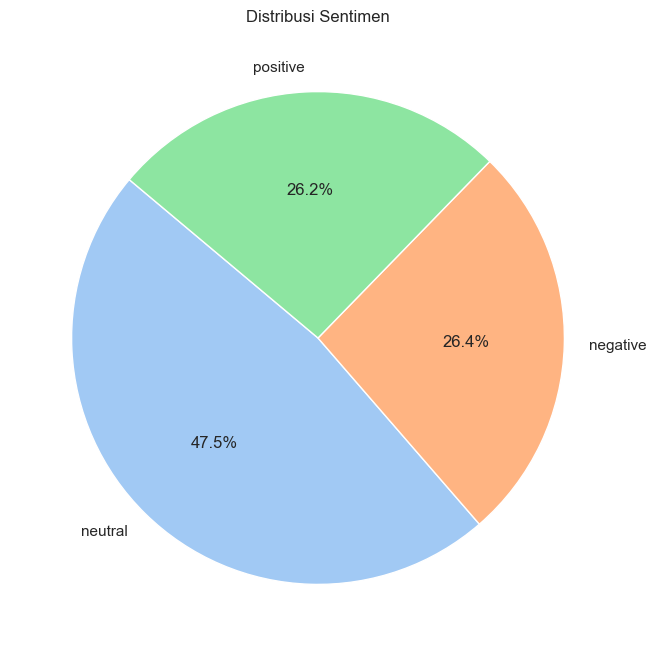

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Hitung jumlah masing-masing label
label_counts = df['label'].value_counts()

# Persiapkan data untuk pie chart
labels = label_counts.index
sizes = label_counts.values

# Atur gaya seaborn
sns.set()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribusi Sentimen')
plt.show()

In [33]:
df['label'].value_counts()

label
neutral     9864
negative    5475
positive    5437
Name: count, dtype: int64

In [34]:
# Simpan DataFrame ke dalam file CSV
df[['Stemming', 'label']].to_csv('DataLabeling_Bacapres2024.csv', index=False)

In [35]:
df = pd.read_csv("DataLabeling_Bacapres2024.csv")

In [36]:
df

,Stemming,label
0,pesan gusdur jabat ikhlas prabowo,positive
1,sambung sesi debat panggung ngawur,negative
2,teori penting ikhlas britulah sosok pimpin ido...,positive
3,anak muda indonesia butuh pimpin pandai rangka...,neutral
4,refleksi pakde reall bismillah indonesia butuh,neutral
...,...,...
20771,tertawa data bps bryohanes mnjabat tingkat mis...,neutral
20772,orang jawa tengah kadrun masuk kepala,neutral
20773,prabowo uzurngurus rumah tangga beranta urus n...,neutral
20774,prabowo calon presiden prabowo kerja capai target,neutral


In [37]:
df.drop_duplicates(subset ="Stemming", keep = 'first', inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20690 entries, 0 to 20775
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Stemming  20690 non-null  object
 1   label     20690 non-null  object
dtypes: object(2)
memory usage: 484.9+ KB


In [39]:
df.rename(columns = {'Stemming':'text'}, inplace = True)

In [40]:
df=df[['text','label']]

In [41]:
df

,text,label
0,pesan gusdur jabat ikhlas prabowo,positive
1,sambung sesi debat panggung ngawur,negative
2,teori penting ikhlas britulah sosok pimpin ido...,positive
3,anak muda indonesia butuh pimpin pandai rangka...,neutral
4,refleksi pakde reall bismillah indonesia butuh,neutral
...,...,...
20771,tertawa data bps bryohanes mnjabat tingkat mis...,neutral
20772,orang jawa tengah kadrun masuk kepala,neutral
20773,prabowo uzurngurus rumah tangga beranta urus n...,neutral
20774,prabowo calon presiden prabowo kerja capai target,neutral


In [42]:
df.to_csv("Final_dataset_Bacapres2024.csv",sep=";")